In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd 
import numpy as np 
import tensorflow as tf 
import tensorflow.keras as keras 
import matplotlib.pyplot as plt 
import seaborn as sns 
import cv2

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Multi_Label_dataset/Multi_Label_dataset/train.csv")
df.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [4]:
df= df.sample(frac=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7254 entries, 2846 to 5035
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           7254 non-null   object
 1   Genre        7254 non-null   object
 2   Action       7254 non-null   int64 
 3   Adventure    7254 non-null   int64 
 4   Animation    7254 non-null   int64 
 5   Biography    7254 non-null   int64 
 6   Comedy       7254 non-null   int64 
 7   Crime        7254 non-null   int64 
 8   Documentary  7254 non-null   int64 
 9   Drama        7254 non-null   int64 
 10  Family       7254 non-null   int64 
 11  Fantasy      7254 non-null   int64 
 12  History      7254 non-null   int64 
 13  Horror       7254 non-null   int64 
 14  Music        7254 non-null   int64 
 15  Musical      7254 non-null   int64 
 16  Mystery      7254 non-null   int64 
 17  N/A          7254 non-null   int64 
 18  News         7254 non-null   int64 
 19  Reality-TV   7254 non-nu

In [6]:
image_id = df["Id"].iloc[:3000]
image_id

2846    tt0120861
6553    tt1210819
3213    tt0181151
86      tt0085780
3319    tt0192949
          ...    
5887    tt1253864
197     tt0087385
6086    tt1934335
5811    tt1683451
5615    tt0814255
Name: Id, Length: 3000, dtype: object

In [7]:
%%time
train_images = []
for i in image_id.to_numpy():
  img = keras.preprocessing.image.load_img(r"/content/drive/MyDrive/Multi_Label_dataset/Multi_Label_dataset/Images" + "/" + i + '.jpg', target_size=(250, 250, 3))
  img = keras.preprocessing.image.img_to_array(img)
  img = img/255.0
  train_images.append(img)

CPU times: user 17.1 s, sys: 3.05 s, total: 20.2 s
Wall time: 32min 20s


In [8]:
train_images

[array([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        ...,
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]], dtype=float32),
 array([[[0.06666667, 0.20784314, 0.3098

In [9]:
train_images = tf.constant(train_images)

In [10]:
df

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
2846,tt0120861,"['Comedy', 'Drama', 'Romance']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6553,tt1210819,"['Action', 'Adventure', 'Western']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3213,tt0181151,"['Comedy', 'Sci-Fi']",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
86,tt0085780,['Horror'],0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3319,tt0192949,"['Drama', 'Comedy']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2592,tt0118818,['Drama'],0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6597,tt1661382,"['Comedy', 'Sport']",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
772,tt0094812,"['Comedy', 'Romance', 'Sport']",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
6772,tt1894476,"['Drama', 'Romance', 'Thriller']",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [11]:
y = df.drop(["Id","Genre"], axis=1)

In [12]:
y = y.iloc[:3000]

In [13]:
y

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
2846,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6553,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3213,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
86,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3319,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5887,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
197,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6086,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5811,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [14]:
labels = y.columns

In [15]:
len(labels)

25

In [20]:
model = keras.models.Sequential()
model.add(keras.layers.RandomRotation(0.35))
model.add(keras.layers.Conv2D(64, (3, 3), input_shape=(250, 250, 3), activation='relu'))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(len(labels), activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
model.fit(train_images[:2000], y.iloc[:2000], validation_data=(train_images[1000:], y.iloc[1000:]), epochs=100)

Epoch 1/100
63/63 [==============================] - 15s 221ms/step - loss: 0.5029 - accuracy: 0.2180 - val_loss: 0.2602 - val_accuracy: 0.3255
Epoch 2/100
63/63 [==============================] - 13s 214ms/step - loss: 0.2510 - accuracy: 0.2775 - val_loss: 0.2534 - val_accuracy: 0.3385
Epoch 3/100
63/63 [==============================] - 13s 213ms/step - loss: 0.2436 - accuracy: 0.2880 - val_loss: 0.2503 - val_accuracy: 0.2465
Epoch 4/100
63/63 [==============================] - 13s 212ms/step - loss: 0.2398 - accuracy: 0.2900 - val_loss: 0.2399 - val_accuracy: 0.3470
Epoch 5/100
63/63 [==============================] - 13s 213ms/step - loss: 0.2383 - accuracy: 0.3165 - val_loss: 0.2378 - val_accuracy: 0.2825
Epoch 6/100
63/63 [==============================] - 13s 213ms/step - loss: 0.2355 - accuracy: 0.3200 - val_loss: 0.2353 - val_accuracy: 0.3320
Epoch 7/100
63/63 [==============================] - 13s 213ms/step - loss: 0.2355 - accuracy: 0.3275 - val_loss: 0.2374 - val_accuracy:

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation_1 (RandomRo  (None, 250, 250, 3)      0         
 tation)                                                         
                                                                 
 conv2d_2 (Conv2D)           (None, 248, 248, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 124, 124, 64)     0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 984064)            0         
                                                                 
 dense_3 (Dense)             (None, 128)               125960320 
                                                                 
 dense_4 (Dense)             (None, 128)              

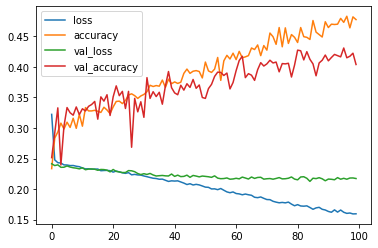

In [19]:
pd.DataFrame(model.history.history).plot()